In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
from keras.models import Sequential, Model
from tensorflow import keras
from keras.layers import Activation, Dense, Flatten,Reshape
tfd = tfp.distributions
from keras.models import Sequential 
model = Sequential()
from keras import models
tfb = tfp.bijectors

tfpl = tfp.layers
tfb = tfp.bijectors

import numpy as np
import matplotlib.pyplot as plt 

- the constructor for distribution lamda layer has one required argumented which is a function, this function takes output of previous layer and return a distribution object. 
- the argument t in the lambda function is the input of previous dense layer, and outputs a normal distribution with mean defined by tensor t, 

# Probabilistic Layer with Bernoulli Distribution

In [49]:
model = Sequential([
    Dense(input_shape =(1,), units = 1, activation = "sigmoid",
          kernel_initializer = tf.constant_initializer(1),
          bias_initializer = tf.constant_initializer(0)),
    tfpl.DistributionLambda(lambda t: tfd.Bernoulli(probs = t),
                            convert_to_tensor_fn = tfd.Distribution.sample)
])

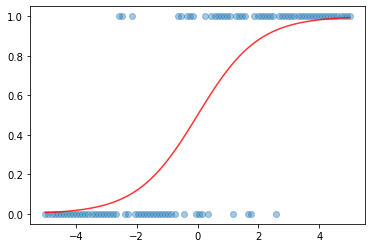

In [50]:
x_plot = np.linspace(-5,5, 100)
plt.scatter(x_plot, model.predict(x_plot), alpha = 0.4)
plt.plot(x_plot, 1/(1+np.exp(-x_plot)), color = 'r', alpha = 0.8)
plt.show()

In [55]:
x = np.array([[0]])

In [56]:
x

array([[0]])

In [57]:
y_model = model(x)

In [58]:
y_model

<tfp.distributions._TensorCoercible 'sequential_9_distribution_lambda_7_tensor_coercible' batch_shape=[1, 1] event_shape=[] dtype=int32>

# behaviouur of a distribution of under repeated calls

In [59]:
for _ in range(5):
    print(model.predict(x))

[[0]]
[[1]]
[[1]]
[[1]]
[[0]]


In [25]:
model = Sequential([
    Dense(1, input_shape = (2,)),
    tfpl.DistributionLambda(
        lambda t: tfd.Normal(loc = t, scale = 1),
    
    
    # get the output of the probabilistic lambda layer as tensor
        convert_to_tensor_fn = tfd.Distribution.sample)
    
    # tfd.Distribution.mean
    # tfd.Distribution.mode
    
])




In [13]:
mu, sigma = 0, 0.1
x_sample = np.random.normal(mu, sigma, size = (16,2))

In [14]:
model(x_sample)

<tfp.distributions._TensorCoercible 'sequential_3_distribution_lambda_1_tensor_coercible' batch_shape=[16, 1] event_shape=[] dtype=float32>

In [19]:
def nll(y_true, y_pred):
    return -y_pred.log_prob(y_true)

In [20]:
model.compile(loss = nll, optimizer = 'rmsprop')
model.fit(x_train,y_train, epochs = 10)

NameError: name 'x_train' is not defined

In [ ]:
model(x_test).sample()
model(x_test).mean()